Dijkstra's algorithm is used to find the shortest path to all nodes in a weighted graph. It is similar to BFS, except it operates on weighted graphs. Because Dijkstra's algorithm operates on different weights, it will prioritize finding the shortest path such that the path to each destination is the "lightest".

In other words, BFS does not revisit nodes but Dijkstra will, if it finds a shorter path (in terms of weight).

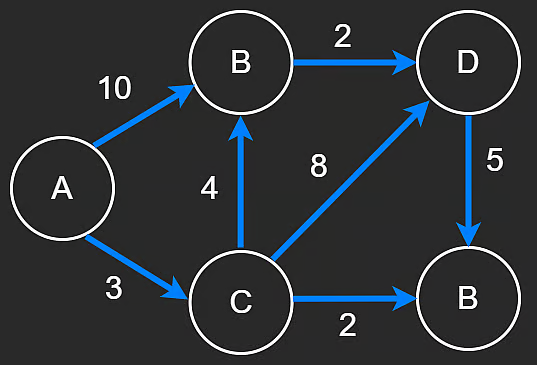

In [3]:
import heapq
def shortestPath(edges, n, src):
    adj = {}
    for i in range(1, n + 1):
        adj[i] = []
        
    # s = src, d = dst, w = weight
    for s, d, w in edges:
        adj[s].append([d, w])

    print(adj)

    shortest = {}
    minHeap = [[0, src]]
    while minHeap:
        w1, n1 = heapq.heappop(minHeap)
        if n1 in shortest:
            continue
        shortest[n1] = w1

        for n2, w2 in adj[n1]:
            if n2 not in shortest:
                heapq.heappush(minHeap, [w1 + w2, n2])
    return shortest

shortestPath([[1,2,1],[2,3,1],[1,4,4],[3,4,1]], n = 4,src = 1)

{1: [[2, 1], [4, 4]], 2: [[3, 1]], 3: [[4, 1]], 4: []}


{1: 0, 2: 1, 3: 2, 4: 3}

743. Network Delay Time
Solved
Medium
Topics
premium lock icon
Companies
Hint
You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the minimum time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.

 

Example 1:

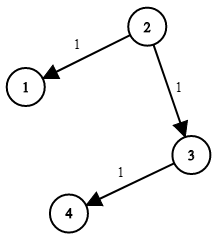

Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
Output: 2
Example 2:

Input: times = [[1,2,1]], n = 2, k = 1
Output: 1
Example 3:

Input: times = [[1,2,1]], n = 2, k = 2
Output: -1
 

Constraints:

1 <= k <= n <= 100
1 <= times.length <= 6000
times[i].length == 3
1 <= ui, vi <= n
ui != vi
0 <= wi <= 100
All the pairs (ui, vi) are unique. (i.e., no multiple edges.)

In [2]:
class Solution:
    def networkDelayTime(self, times, n, k):

        minm = 0

        adj = {}
        for i in range(1,n+1):
            adj[i] = []
        
        for ui,vi,ti in times:
            adj[ui].append([vi,ti])

        shortest = {}
        minHeap = [[0,k]]
        while minHeap:
            w1,n1 = heapq.heappop(minHeap)
            if n1 in shortest:
                continue
            shortest[n1] = w1
            
            minm = w1

            for n2,w2 in adj[n1]:
                if n2 not in shortest:
                    heapq.heappush(minHeap,[w1+w2,n2])

        if len(shortest) == n:
            return minm

        return -1
        
        

1514. Path with Maximum Probability

You are given an undirected weighted graph of n nodes (0-indexed), represented by an edge list where edges[i] = [a, b] is an undirected edge connecting the nodes a and b with a probability of success of traversing that edge succProb[i].

Given two nodes start and end, find the path with the maximum probability of success to go from start to end and return its success probability.

If there is no path from start to end, return 0. Your answer will be accepted if it differs from the correct answer by at most 1e-5.

 

Example 1:

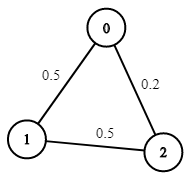

Input: n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.2], start = 0, end = 2
Output: 0.25000
Explanation: There are two paths from start to end, one having a probability of success = 0.2 and the other has 0.5 * 0.5 = 0.25.
Example 2:

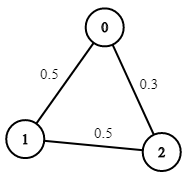

Input: n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.3], start = 0, end = 2
Output: 0.30000
Example 3:

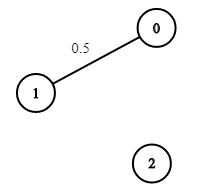

Input: n = 3, edges = [[0,1]], succProb = [0.5], start = 0, end = 2
Output: 0.00000
Explanation: There is no path between 0 and 2.
 

Constraints:

2 <= n <= 10^4
0 <= start, end < n
start != end
0 <= a, b < n
a != b
0 <= succProb.length == edges.length <= 2*10^4
0 <= succProb[i] <= 1
There is at most one edge between every two nodes.

In [3]:
class Solution(object):
    def networkDelayTime(self, times, n, k):
        """
        :type times: List[List[int]]
        :type n: int
        :type k: int
        :rtype: int
        """
        t = 0
        adj = {}
        for i in range(1,n+1):
            adj[i] = []
        
        for ui,vi,wi in times:
            adj[ui].append([vi,wi])

        shortest = {}
        minHeap = [[0,k]]
        while minHeap:
            w1,n1 = heapq.heappop(minHeap)

            if n1 in shortest:
                continue
            shortest[n1] = w1
            t = w1
            for n2,w2 in adj[n1]:
                if n2 not in shortest:
                    heapq.heappush(minHeap,[w1+w2,n2])
        if len(shortest) == n: return t
        return -1